In [1]:
# !pip install requests

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
data = pd.read_csv('data/psei_data.csv')

# Data Description

- c: closing price
- h: high price
- l: low price
- o: opening price
- t: date
- v: trading volume
- y: year
- m: month
- d: day
- w: week number
- w: dday of week number
- last: last price
- changeprice: change from last to close
- pchangepercent: price change from last to close
- symbol: stock symbol

In [4]:
data.head()

,c,h,l,o,t,v,y,m,d,w,wd,last,change,pchange,symbol
0,1.66,1.66,1.66,1.66,2006-04-03,250000.0,2006,4,3,14,0,1.66,0.00,0.000000,2GO
1,1.64,1.64,1.64,1.64,2006-04-04,13000.0,2006,4,4,14,1,1.66,-0.02,-0.012048,2GO
2,1.64,1.64,1.60,1.60,2006-04-12,320000.0,2006,4,12,15,2,1.64,0.00,0.000000,2GO
3,1.68,1.68,1.68,1.68,2006-04-20,1000.0,2006,4,20,16,3,1.64,0.04,0.024390,2GO
4,1.68,1.68,1.68,1.68,2006-04-21,3000.0,2006,4,21,16,4,1.68,0.00,0.000000,2GO


In [5]:
data.symbol.unique()

array(['2GO', 'AAA', 'AB', 'ABA', 'ABG', 'ABS', 'ABSP', 'AC', 'ACE',
       'ACPA', 'ACPB2', 'ACR', 'AEV', 'AGI', 'ALCO', 'ALHI', 'ALI', 'ANI',
       'ANS', 'AP', 'APC', 'APL', 'APO', 'APX', 'AR', 'ARA', 'AT', 'ATI',
       'ATN', 'ATNB', 'AUB', 'BC', 'BCB', 'BCOR', 'BDO', 'BEL', 'BHI',
       'BKR', 'BLFI', 'BLOOM', 'BMM', 'BPI', 'BRN', 'BSC', 'CA', 'CAT',
       'CDC', 'CEB', 'CEI', 'CEU', 'CHI', 'CHIB', 'CHP', 'CIC', 'CIP',
       'CNPF', 'COAL', 'COL', 'COSCO', 'CPG', 'CPM', 'CPV', 'CPVB',
       'CROWN', 'CSB', 'CYBR', 'DAVIN', 'DD', 'DDPR', 'DFNN', 'DIZ',
       'DMC', 'DMPL', 'DNA', 'DNL', 'DWC', 'ECP', 'EDC', 'EEI', 'EG',
       'ELI', 'EMP', 'EURO', 'EVER', 'EW', 'FAF', 'FDC', 'FEU', 'FFI',
       'FGEN', 'FGENF', 'FGENG', 'FJP', 'FLI', 'FMETF', 'FNI', 'FOOD',
       'FPH', 'FPHP', 'FPI', 'GEO', 'GERI', 'GLO', 'GLOPP', 'GMA7',
       'GMAP', 'GPH', 'GREEN', 'GSMI', 'GTCAP', 'H2O', 'HI', 'HLCM',
       'HOUSE', 'HVN', 'I', 'ICT', 'IDC', 'IMI', 'IMP', 'ION', 'IPM',
       'IPO'

In [6]:
# Set datetime to proper data type
data['datetime'] = pd.to_datetime(data['t'])

# Set date as index
data.index = data['datetime']

In [7]:
data.dtypes

c                  float64
h                  float64
l                  float64
o                  float64
t                   object
v                  float64
y                    int64
m                    int64
d                    int64
w                    int64
wd                   int64
last               float64
change             float64
pchange            float64
symbol              object
datetime    datetime64[ns]
dtype: object

In [8]:
data['datetime'].min(), data['datetime'].max()

(Timestamp('1983-01-03 00:00:00'), Timestamp('2018-02-19 00:00:00'))

### Pick a Random Stock

In [9]:
data.head(1)

,c,h,l,o,t,v,y,m,d,w,wd,last,change,pchange,symbol,datetime
datetime,,,,,,,,,,,,,,,,
2006-04-03,1.66,1.66,1.66,1.66,2006-04-03,250000.0,2006,4,3,14,0,1.66,0.0,0.0,2GO,2006-04-03


In [10]:
stock = 'CEB'
date_from = '2016'
date_to = '2018'

In [11]:
ceb_data = data[data['symbol']==stock][date_from:date_to].sort_index()[['c','last']]

In [12]:
ceb_data

,c,last
datetime,,
2016-01-04,82.60,82.35
2016-01-05,81.85,82.60
2016-01-06,82.20,81.85
2016-01-07,81.95,82.20
2016-01-08,79.75,81.95
2016-01-11,76.00,79.75
2016-01-12,76.50,76.00
2016-01-13,79.50,76.50
2016-01-14,78.00,79.50


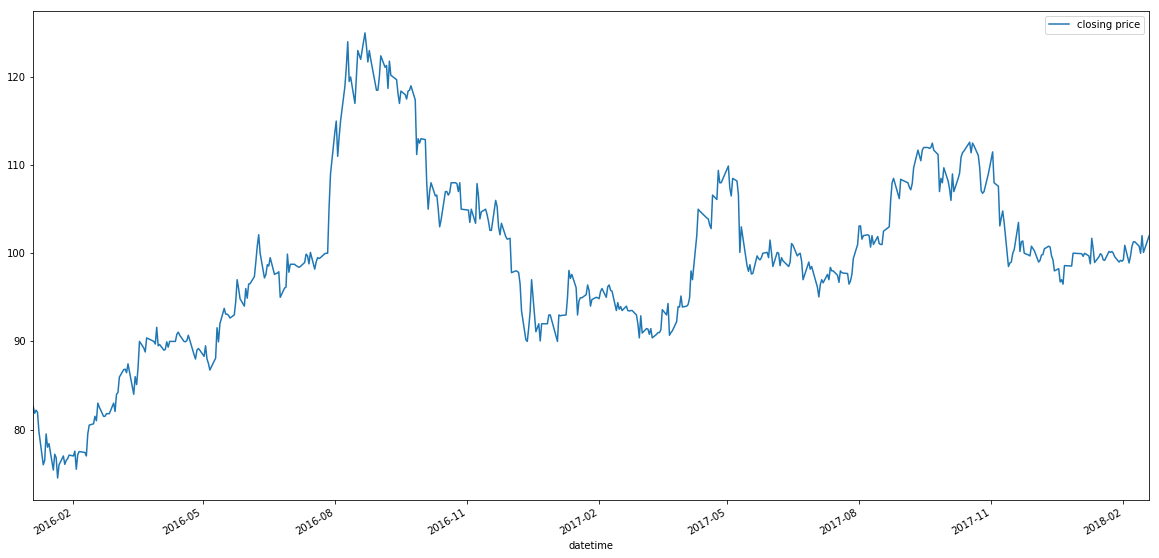

In [13]:
plt.subplots(figsize=(20, 10))
ceb_data.c.plot(label='closing price')
plt.legend()

### 20-EMA and 50-EMA on BPI Data

These smoothing functions are more commonly used as indicators for buy and sell.

In [14]:
# Calculate EMAs
ceb_data['ema_20'] = ceb_data['c'].ewm(span=20, min_periods=0, adjust=False, ignore_na=False).mean()
ceb_data['ema_50'] = ceb_data['c'].ewm(span=50, min_periods=0, adjust=False, ignore_na=False).mean()

# Calculate Derivative of EMAS
ceb_data['dema_20'] = ceb_data['ema_20'].diff()
ceb_data['dema_50'] = ceb_data['ema_50'].diff()

In [15]:
ceb_data.head()

,c,last,ema_20,ema_50,dema_20,dema_50
datetime,,,,,,
2016-01-04,82.60,82.35,82.600000,82.600000,NaN,NaN
2016-01-05,81.85,82.60,82.528571,82.570588,-0.071429,-0.029412
2016-01-06,82.20,81.85,82.497279,82.556055,-0.031293,-0.014533
2016-01-07,81.95,82.20,82.445157,82.532288,-0.052122,-0.023767
2016-01-08,79.75,81.95,82.188475,82.423179,-0.256682,-0.109109


# CEB Closing Prices with EMA Indicators

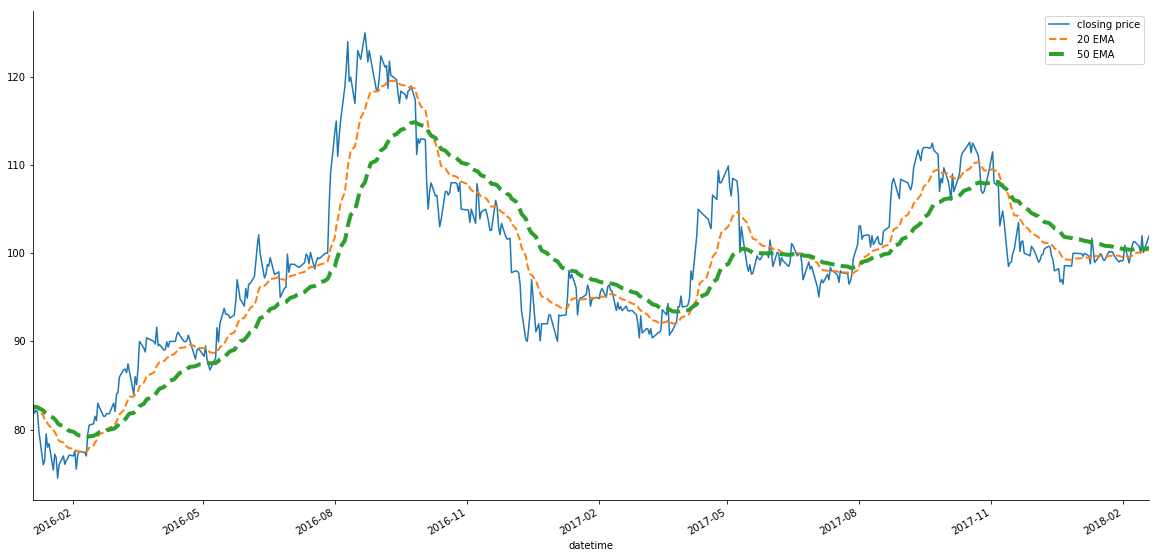

In [16]:
ax = plt.subplot()
ax = ceb_data.c.plot(label='closing price', figsize=(20, 10))
ceb_data.ema_20.plot(label='20 EMA', style='--', linewidth=2, ax=ax)
ceb_data.ema_50.plot(label='50 EMA', style='--', linewidth=4,  ax=ax)
plt.legend()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

Generally: 
- if the larger EMA crosses above the smaller EMA, this signals a buy.
- if the larger EMA crosses below the smaller EMA, this signals a sell.

### Extract Crossing Instances

These instances indicate when we should buy or sell.

In [17]:
previous_20 = ceb_data['ema_20'].shift(1)
previous_50 = ceb_data['ema_50'].shift(1)
crossing_sell = ((ceb_data['ema_20'] <= ceb_data['ema_50']) & (previous_20 >= previous_50))
crossing_buy =  ((ceb_data['ema_20'] >= ceb_data['ema_50']) & (previous_20 <= previous_50))


In [18]:
# Buy Dates
ceb_data.loc[crossing_buy]

,c,last,ema_20,ema_50,dema_20,dema_50
datetime,,,,,,
2016-02-23,81.5,81.5,79.839713,79.829626,0.174767,0.068179
2017-04-07,97.0,98.0,93.976470,93.904132,0.318266,0.126362
2017-08-02,103.1,103.1,98.993863,98.829127,0.432225,0.174321


In [19]:
# Sell Dates
ceb_data.loc[crossing_sell]

,c,last,ema_20,ema_50,dema_20,dema_50
datetime,,,,,,
2016-01-05,81.85,82.6,82.528571,82.570588,-0.071429,-0.029412
2016-10-07,108.00,107.0,113.222298,113.357144,-0.549716,-0.218659
2017-06-23,97.00,99.1,99.631009,99.741874,-0.276948,-0.111913
2017-11-13,98.50,103.5,106.616383,107.103375,-0.854356,-0.351158


# Forecast The Future

Since we we want to know these buy and sell signals ahead of time, we'll try to see if past trends, forecasts the future.

### Clean Stock Price Signal

In [32]:
pd.plotting.register_matplotlib_converters()

In [21]:
# Use only 2016 - 2018 data and resample to daily closing price
y_orig = ceb_data['c']
yn = ceb_data['c'].resample('D').max()

# Get 'last price'
yn_last = ceb_data['last'].resample('D').max().shift(-1)

# Use 'last price' to fill NaN values of the closing prices.
yn.fillna(yn_last, inplace=True)

# Use average of previous and after to fill NaN values and itearte until no more null values are unimputed
while yn.isna().sum() > 0:
    yn_forward = yn.shift(1)
    yn_backward = yn.shift(-1)
    yn_mean = pd.concat([yn_forward, yn_backward], axis=1).mean(axis=1)
    yn.fillna(yn_mean, inplace=True)

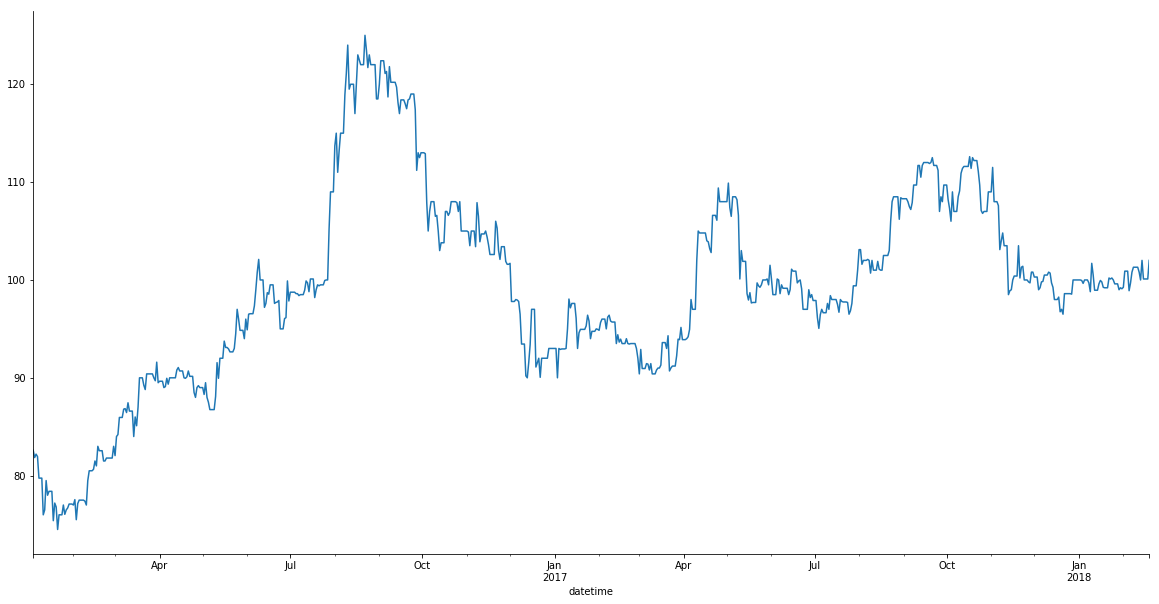

In [22]:
ax = plt.subplot()
ax = yn.plot(label='closing price', figsize=(20, 10))


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Forcast using Prophet

Prophet is an open source library published by Facebook that is based on decomposable (trend+seasonality+holidays) models. It provides us with the ability to make time series predictions with good accuracy using simple intuitive parameters and has support for including impact of custom seasonality and holidays!

Here's the resource for more information on [Prophet](https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/).

In [23]:
# !pip install fbprophet

In [24]:
from fbprophet import Prophet
pd.options.display.max_columns = 999

In [25]:
yn.fillna(method='ffill', inplace=True)

In [26]:
yn_df = pd.DataFrame(yn)
yn_df['y'] = yn_df['c']
yn_df['ds'] = yn_df.index

In [27]:
date_split = '2018-01-01'
train, test = yn_df[:date_split], yn_df[date_split:]

In [28]:
test.shape

(50, 3)

In [29]:
months = 3 # Forecast for how many months

In [30]:
m = Prophet(yearly_seasonality = True, weekly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(train)
future = m.make_future_dataframe(periods=(test.shape[0]+(months*30)))
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Train-Test Split

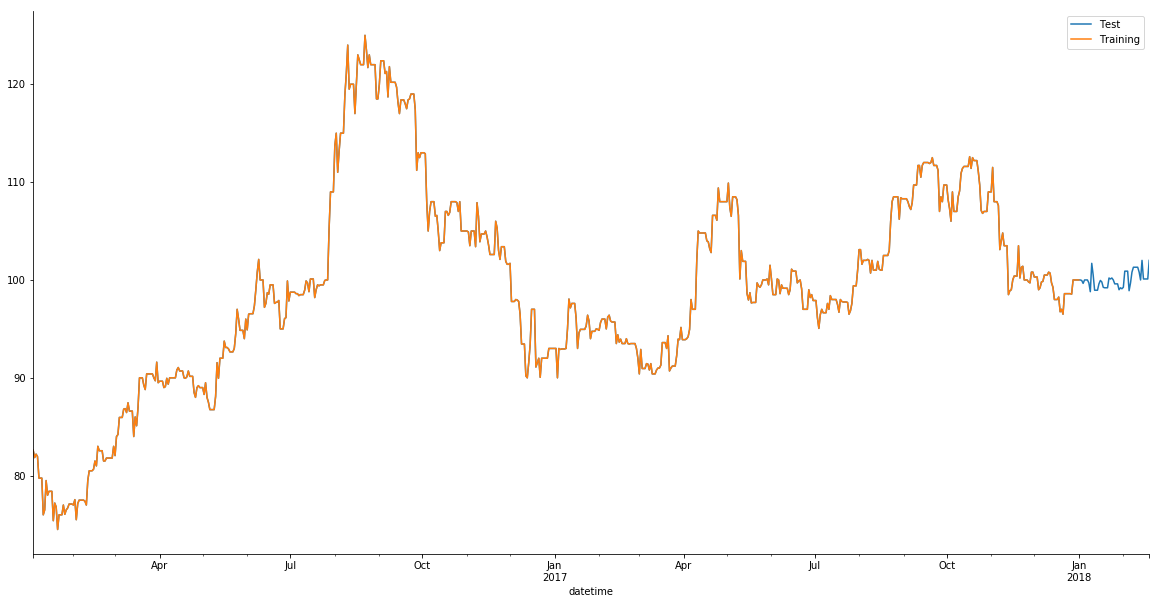

In [33]:
ax = yn_df.y.plot(figsize=(20, 10))
train.y.plot(ax=ax)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(['Test', 'Training'])

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

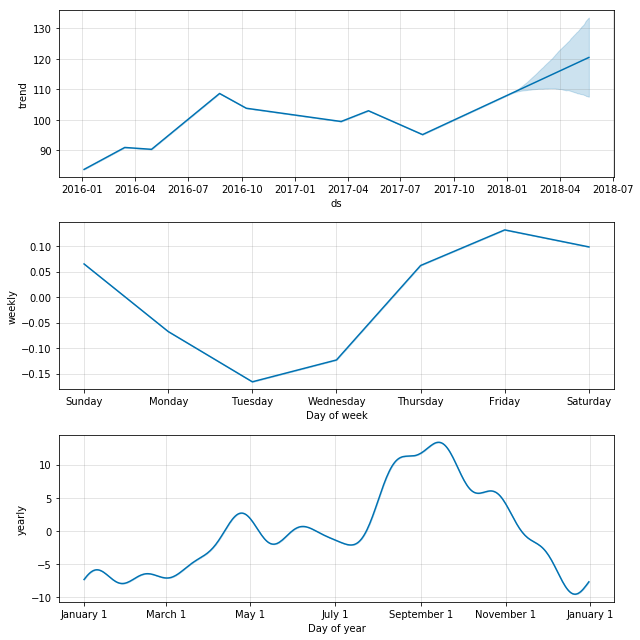

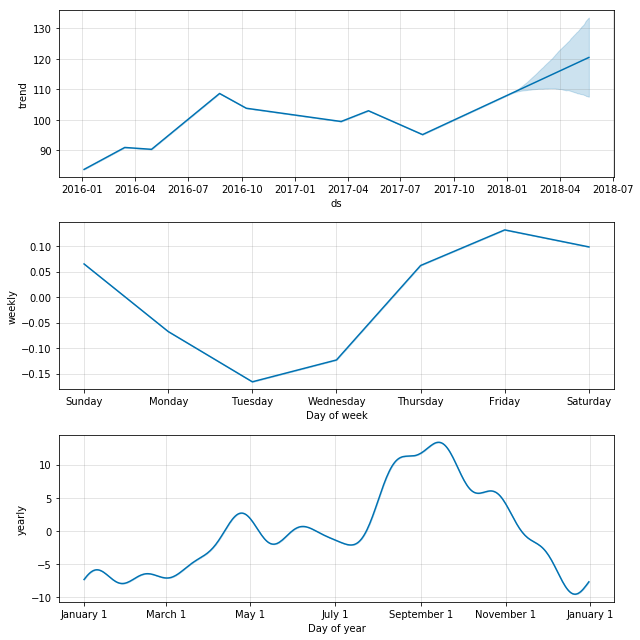

In [34]:
m.plot_components(forecast)

- Plot above shows that prices are higher on Septembers and on Fridays.
- Lowest prices are on November/December/January, and on Tuesdays.

Above tells us that its best to buy at the end of the year, and on Mondays while its good to sell on April and on Thursdays.

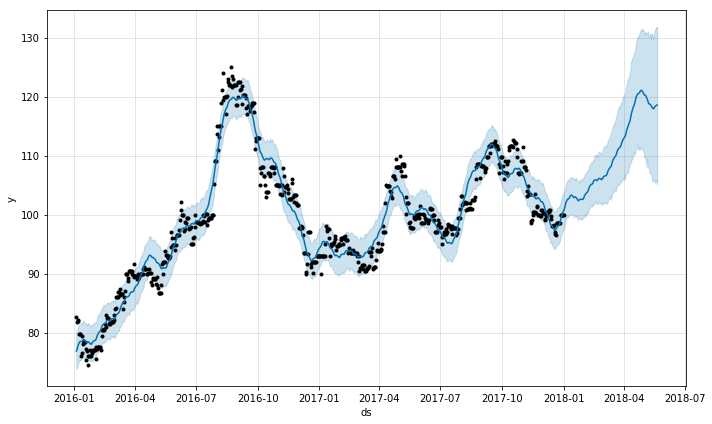

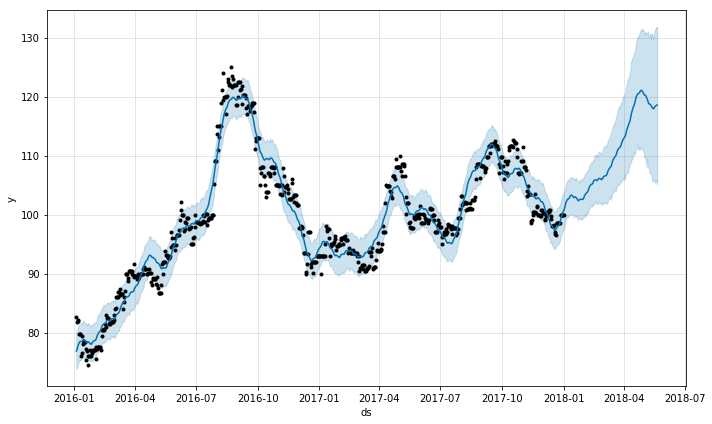

In [36]:
m.plot(forecast)
plt.show()

# Prophet Forecast vs Actual CEB Close Price

In [37]:
test_df = pd.merge(forecast.set_index('ds')['2018':].reset_index(), test, on='ds', how='left')
test_df.index = test_df['ds']

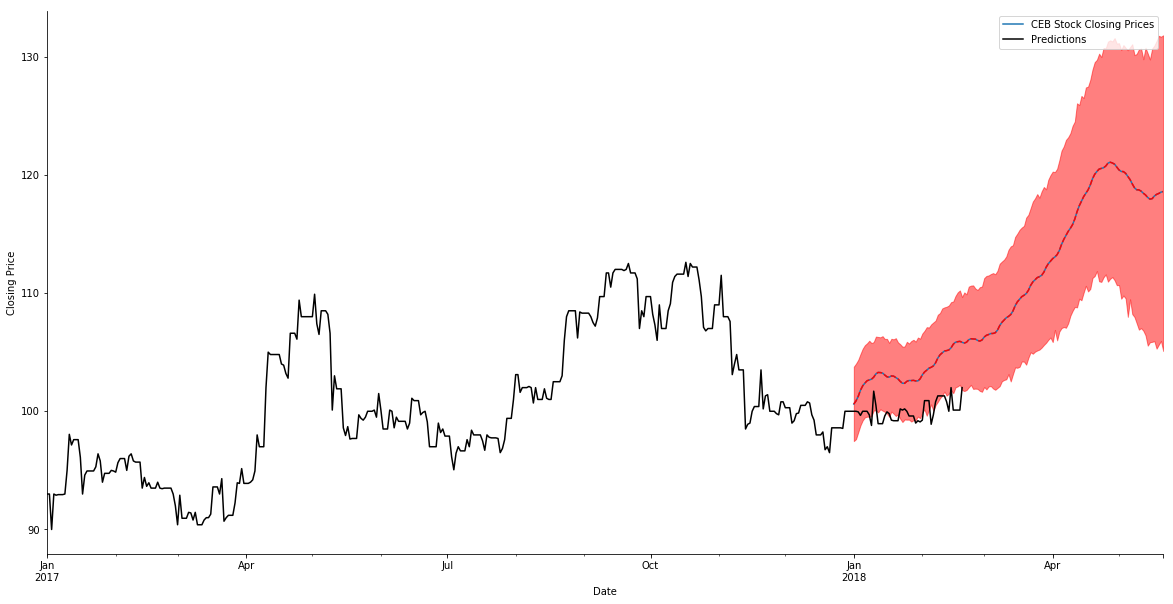

In [38]:
ax = test_df.yhat.plot(figsize=(20, 10))
yn_df['2017-01-01':].y.plot(ax=ax, color='Black')
test_df.yhat.plot(ax=ax, style='--', color='r')
ax.fill_between(test_df.index,
                test_df.yhat_lower,
                test_df.yhat_upper, color='r', alpha=.5)
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(['Test', 'Training'])

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


plt.legend(['CEB Stock Closing Prices', 'Predictions'])
plt.show()


# Find Buy/Sell Signals

In [ ]:
ceb_pred_data = test_df[['yhat']]

# Calculate EMAs
ceb_pred_data['ema_20'] = ceb_pred_data['yhat'].ewm(span=20, min_periods=0, adjust=False, ignore_na=False).mean()
ceb_pred_data['ema_50'] = ceb_pred_data['yhat'].ewm(span=50, min_periods=0, adjust=False, ignore_na=False).mean()

# Calculate Derivative of EMAS
ceb_pred_data['dema_20'] = ceb_pred_data['ema_20'].diff()
ceb_pred_data['dema_50'] = ceb_pred_data['ema_50'].diff()

In [ ]:
ax = plt.subplot()
ax = ceb_pred_data.yhat.plot(label='predicted closing price', figsize=(20, 10))
ceb_pred_data.ema_20.plot(label='20 EMA', style='--', linewidth=2, ax=ax)
ceb_pred_data.ema_50.plot(label='50 EMA', style='--', linewidth=4,  ax=ax)
plt.legend()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [ ]:
previous_20 = ceb_pred_data['ema_20'].shift(1)
previous_50 = ceb_pred_data['ema_50'].shift(1)
crossing_pred_sell = ((ceb_pred_data['ema_20'] <= ceb_pred_data['ema_50']) & (previous_20 >= previous_50))
crossing_pred_buy =  ((ceb_pred_data['ema_20'] >= ceb_pred_data['ema_50']) & (previous_20 <= previous_50))

In [ ]:
# Sell Dates
ceb_pred_data.loc[crossing_pred_sell]

In [ ]:
# Buy Dates
ceb_pred_data.loc[crossing_pred_buy]